# Silhouette Score
* Silhouette refers to a method of interpretation and validation of consistency within clusters of data.
* Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique.
* Its value ranges from -1 to 1.
* formula:
> 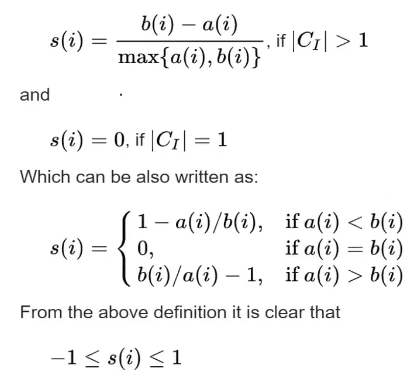
> 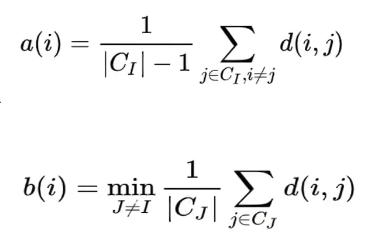

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('../../../dataset/Iris.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
df.drop(columns='species',inplace=True)
df.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


* first we need to find the best k value for making the clusters

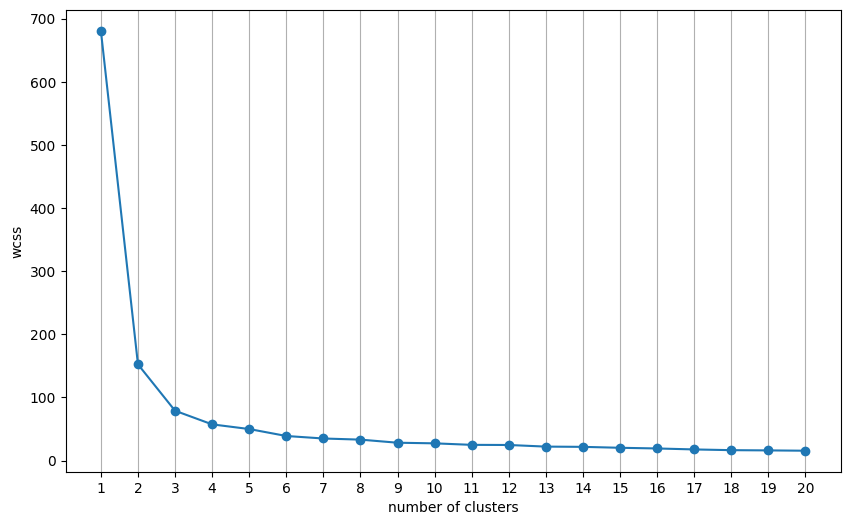

In [ ]:
wcss=[]
for i in range(1,21):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,6))
plt.plot([i for i in range(1,21)],wcss,marker='o')
plt.xlabel('number of clusters')
plt.xticks([i for i in range(1,21)])
plt.ylabel('wcss')
plt.grid(axis='x')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
km.fit_predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
df['predicted'] = km.fit_predict(df)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,predicted
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [ ]:
# for fingding the labels which is used for predicting the data
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

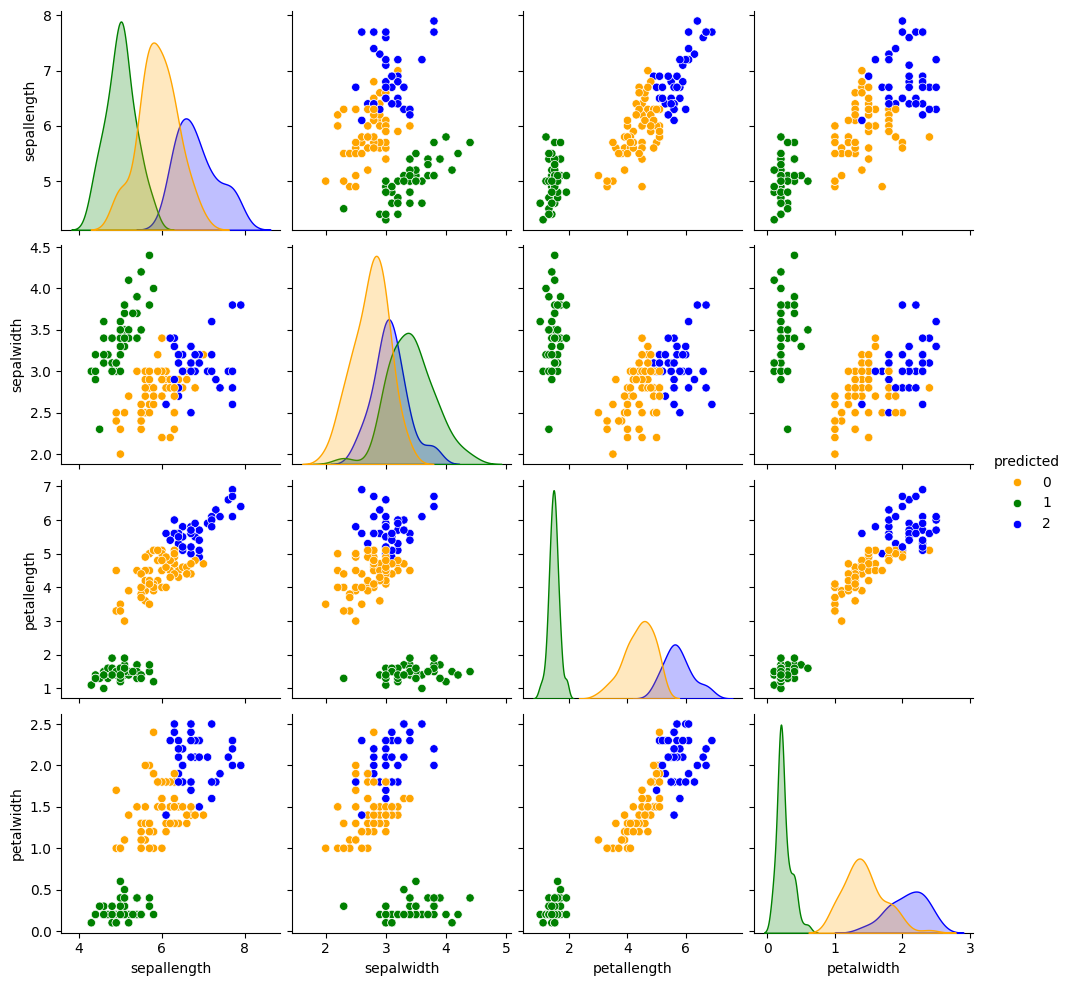

In [ ]:
sns.pairplot(data=df,hue='predicted',palette=['orange','green','blue'])
plt.show()

* For checking the actual number of clusters which can be made from the dataset we need to use Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(df,labels=km.labels_)

np.float64(0.684936462996038)

* The blow graph shows that the highest score is achieved when the number of clusters are 3. 

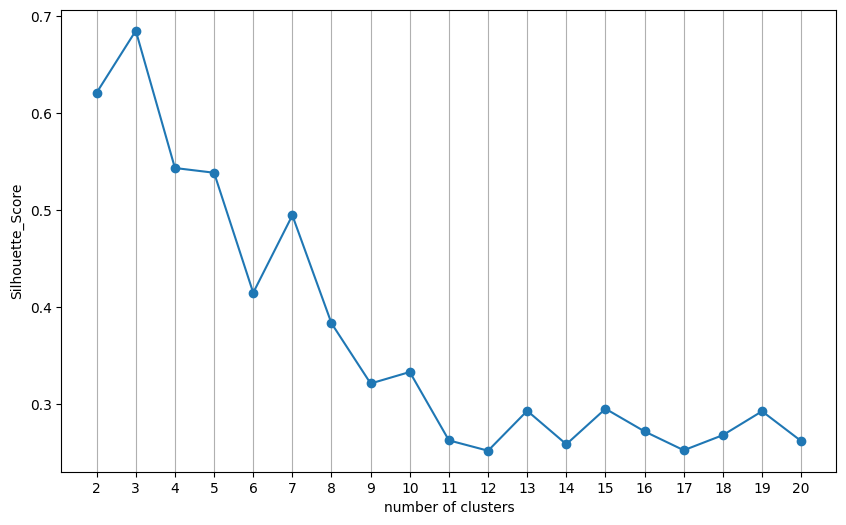

In [ ]:
no_clust = [i for i in range(2,21)]
ss = []
for i in no_clust:
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    ss.append(silhouette_score(df,km.labels_))

plt.figure(figsize=(10,6))
plt.plot(no_clust,ss,marker='o')
plt.xlabel('number of clusters')
plt.ylabel('Silhouette_Score')
plt.xticks(no_clust)
plt.grid(axis='x')
plt.show()